<img src="logo_small.png" alt="The spark Foundation LogO" style="width:200px;height:200px;">


<br>
<br>
<h2><font color = "red">TASK 3-THE SPARKS FOUNDATION INTERNSHIP NOV'2020</font></h2>

<br>

### Name - Faizan Ashraf
### E-mail - go2faizanashraf@gmail.com

### Perform Exploratory Data Analysis on 'Indian Premiere League'¶

dataset:- :  https://bit.ly/34SRn3b

        


# OBJECTIVE

### . Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ 


#### .   As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. 


### . Suggest teams or players a company should endorse for its products.




<h2><u><font color = "orange">Importing Libraries</font></u>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline


<h2><u><font color = "Black">Importing Data set</font></u>

In [2]:
df = pd.read_csv("4_matches.csv")
df1 = pd.read_csv("4_deliveries.csv")


<h2><u><font color = "orange">Seeing columns in data set</font></u>

In [4]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# Lets first analyse out Matches.csv Data set

In [11]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [14]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [15]:
df.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


# Lets see the null value in each columns

In [17]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [27]:

# Suppose we wan to drop those rows where the columns {'winner'} value is Nan then we need to follow below code



# df.dropna(subset=['winner'], how='all', inplace=True)
# df.isnull().sum()

In [28]:
df.shape

(752, 18)

## Matches we have in the data set

In [29]:
df.id.max()

11415

# Season we have in our dataset

In [37]:
season = df.season.unique()
season

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [39]:
len(season)

12

In [41]:
df.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

# So Mumbai Indians have won the maximum matches

<h2><b><font color = "orange">Lets see it virtually</font></b>

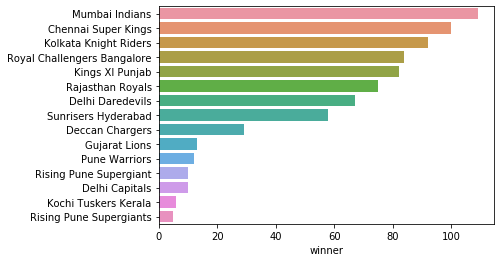

In [44]:

data = df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

# So the most Successful team is Mumbai Indias

<h2><u><font color = "orange">Team won by Maximum Runs</font></u>

In [52]:
max_run = df.win_by_runs.max()
max_run_winner = df[df['win_by_runs'] == max_run] 
print(max_run_winner)

    id  season   city        date           team1             team2  \
43  44    2017  Delhi  2017-05-06  Mumbai Indians  Delhi Daredevils   

         toss_winner toss_decision  result  dl_applied          winner  \
43  Delhi Daredevils         field  normal           0  Mumbai Indians   

    win_by_runs  win_by_wickets player_of_match             venue  \
43          146               0     LMP Simmons  Feroz Shah Kotla   

        umpire1    umpire2 umpire3  
43  Nitin Menon  CK Nandan     NaN  


In [57]:
print("So Mumbai Indians is the team is the team to win by maximum run of 146")

So Mumbai Indians is the team is the team to win by maximum run of 146


# So we can say that Mumbai Indians is the team with Best Batsman. 

<h2><u><font color = "blue">Team won by Maximum Wickets</font></u>

In [59]:
df.iloc[df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

<h2><u><font color = "orange">Team won by minimum runs</font></u>

In [62]:
 df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

<h2><u><font color = "black">Team won by Minimum Wickets</font></u>


In [65]:
df.iloc[df[df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                         562
season                                    2015
city                                    Mumbai
date                                2015-05-10
team1              Royal Challengers Bangalore
team2                           Mumbai Indians
toss_winner        Royal Challengers Bangalore
toss_decision                              bat
result                                  normal
dl_applied                                   0
winner             Royal Challengers Bangalore
win_by_runs                                 39
win_by_wickets                               0
player_of_match                 AB de Villiers
venue                         Wankhede Stadium
umpire1                              JD Cloete
umpire2                          C Shamshuddin
umpire3                                    NaN
Name: 561, dtype: object

In [66]:
df.iloc[df[df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Royal Challengers Bangalore'

# So Royal Challengers Bangalore is the team won by Minimum wickets

## Observation :
#### Mumbai Indians is the team which won by maximum and minimum runs
#### Royal Challengers Banglore is the team which won by minimum wickets
#### Kolkata Knight Riders is the team which won by maximum  wickets

<h2><u><font color = "orange">Season Which had most number of matches</font></u>


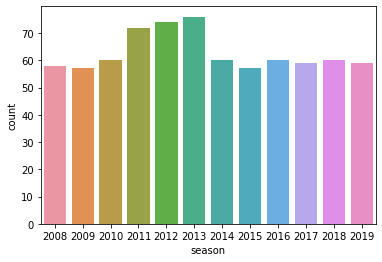

In [68]:
sns.countplot(x='season', data=df)
plt.show()

 # So 2013 season have maximum number of matches

<h1><u><font color = "orange">To Suggest teams or players a company should endorse for its products</font></u>


# 1) Best Team company should endorse

In [69]:
df['winner']

0              Sunrisers Hyderabad
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
751                 Mumbai Indians
752                 Mumbai Indians
753                 Delhi Capitals
754            Chennai Super Kings
755                 Mumbai Indians
Name: winner, Length: 752, dtype: object

In [71]:
df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [79]:
df2 = df['winner'].value_counts().rename_axis('Team_Names').reset_index(name='Number_of_matches_won')
df2[["Team_Names","Number_of_matches_won"]]

,Team_Names,Number_of_matches_won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


<h3><b><font color = "brown">Here we can see Mumbai Indians is the Team with most of the wins so we can say Mumbai Indians is the best team a company should endorse for its products </font></b>


<h2><u><font color = "orange">LETS SEE IT USING VISUALIZATION </font></u>


In [104]:
teams_list = df2["Team_Names"].tolist()
matches_won_list = df2["Number_of_matches_won"].tolist()



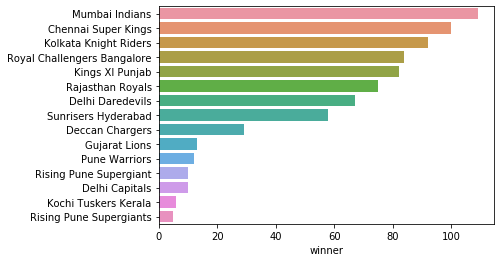

In [109]:
ata = df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

# Top Player of the match winners

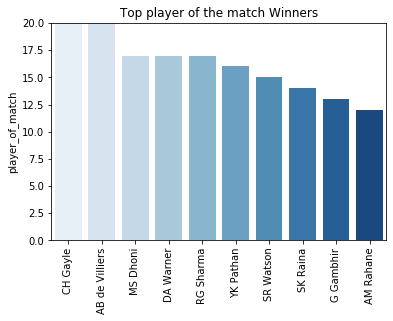

In [110]:

top_players = df.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=df)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Blues");
plt.show()

<h2><u><font color = "orange">CH Gayle</font></u>
 is the most Successful player in all match 

So we see that <b> CH Gayle </b> is the players the company should endorse for its products

# END